In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import fashion_mnist

In [104]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


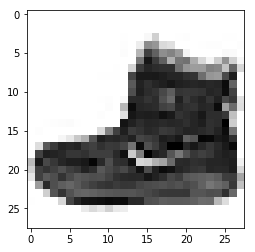

In [105]:
plt.imshow(train_x[0], cmap="Greys")

In [106]:
# shape 需要特別的規定
train_x = train_x.reshape(60000, 28, 28, 1)
test_x = test_x.reshape(10000, 28, 28, 1)

In [107]:
from keras.utils import np_utils # one-hot encoding

In [108]:
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

In [109]:
train_x = train_x / 255
test_x = test_x / 255

In [110]:
# 感受野 filter 的邊長通常都以奇數為主
# filter 的個數大部份會越來越多來解決後面越來越複雜的問題

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [152]:
model = Sequential()

In [153]:
# conv --> maxpool --> conv --> maxpool --> conv --> maxpool
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
# 進入 fully connected 前需要拉平
model.add(Flatten())
model.add(Dense(40, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(90, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [154]:
model.summary() # (3 x 3 x 4) x 8 + 8

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)              

In [159]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [160]:
model.fit(train_x, train_y, batch_size=1000, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 43s 712us/step - loss: 0.0122 - accuracy: 0.9169
Epoch 2/25
60000/60000 [==============================] - 37s 615us/step - loss: 0.0114 - accuracy: 0.9219
Epoch 3/25
60000/60000 [==============================] - 32s 535us/step - loss: 0.0110 - accuracy: 0.9254
Epoch 4/25
60000/60000 [==============================] - 34s 559us/step - loss: 0.0110 - accuracy: 0.9255
Epoch 5/25
60000/60000 [==============================] - 34s 568us/step - loss: 0.0109 - accuracy: 0.9263
Epoch 6/25
60000/60000 [==============================] - 33s 543us/step - loss: 0.0107 - accuracy: 0.9283
Epoch 7/25
60000/60000 [==============================] - 33s 551us/step - loss: 0.0107 - accuracy: 0.9278
Epoch 8/25
60000/60000 [==============================] - 28s 471us/step - loss: 0.0104 - accuracy: 0.9297
Epoch 9/25
60000/60000 [==============================] - 31s 511us/step - loss: 0.0101 - accuracy: 0.9320
Epoch 10/25
60000/60000 [============

In [163]:
score = model.evaluate(test_x, test_y)

10000/10000 [==============================] - 2s 194us/step


In [164]:
print("loss：%.5f\n準確率：%.2f%%" % (score[0], score[1]*100))

loss：0.01286
準確率：91.29%
